## import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

In [2]:
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline
import seaborn as sns               #For better Visualisation
from bs4 import BeautifulSoup       #For Text Parsing

In [3]:
df = pd.read_csv('HASOC-Hindi2021(train).csv')

In [4]:
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE


# Class Distribution

NONE    3161
OFFN     654
HATE     566
PRFN     213
Name: task_2, dtype: int64


C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='task_2'>

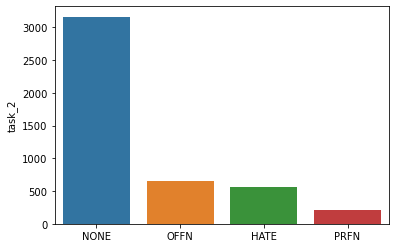

In [5]:
import seaborn as sns
x=df['task_2'].value_counts()
print(x)
sns.barplot(x.index,x)

In [6]:
df.isna().sum()

Unnamed: 0    0
_id           0
tweet_id      0
text          0
task_1        0
task_2        0
dtype: int64

In [7]:
df.shape

(4594, 6)

In [8]:
# Names Of columns in our dataset
df.columns

Index(['Unnamed: 0', '_id', 'tweet_id', 'text', 'task_1', 'task_2'], dtype='object')

In [9]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4594 non-null   int64 
 1   _id         4594 non-null   object
 2   tweet_id    4594 non-null   object
 3   text        4594 non-null   object
 4   task_1      4594 non-null   object
 5   task_2      4594 non-null   object
dtypes: int64(1), object(5)
memory usage: 215.5+ KB


In [10]:
# There are 5 unique sentiment types in our dataset
df['task_2'].value_counts()

NONE    3161
OFFN     654
HATE     566
PRFN     213
Name: task_2, dtype: int64

# Specific to tweet and sentiment.

In [11]:
df[df['task_2']=='NONE']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE
8,3664,60c5d7495659ea5e55df1ad1,hi_hasoc_2021_3664,#MuddaGaramHai चुनाव नतीजों के बाद बंगाल में ज...,NOT,NONE
...,...,...,...,...,...,...
4588,3871,60c5d7495659ea5e55df1c93,hi_hasoc_2021_3871,"@bachpanamitabh आज बंगाल, पुडुचेरी, तमिलनाडु, ...",NOT,NONE
4589,2481,60c5d7495659ea5e55df13ff,hi_hasoc_2021_2481,सिवान के पुर्व सांसद मरहुम मो सहाबुदीन के रहस्...,NOT,NONE
4590,3711,60c5d7495659ea5e55df1b13,hi_hasoc_2021_3711,वर्ष 1989-1990 के दौरान कश्मीर के हिंदुओं के स...,NOT,NONE
4591,3113,60c5d7495659ea5e55df1678,hi_hasoc_2021_3113,#किसानों_का_मोदी_को_धोबीपटका #ResignPMmodi htt...,NOT,NONE


In [12]:
df[df['task_2']=='OFFN']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
6,5848,60c5d7495659ea5e55df1b22,hi_hasoc_2021_5852,यही तेरी असलियत है कि चोरी रोज करेगा खेत मे ले...,HOF,OFFN
9,3331,60c5d7495659ea5e55df1701,hi_hasoc_2021_3331,@anushka_s2 मूर्ख लड़की,HOF,OFFN
12,4872,60c5d7495659ea5e55df0d5f,hi_hasoc_2021_4875,What a shameless guy !! दोगला !! https://t.co/...,HOF,OFFN
15,6026,60c5d7495659ea5e55df1bbe,hi_hasoc_2021_6031,@Dr_Uditraj अमेरिका में तुम जैसे लोग दोगला राज...,HOF,OFFN
...,...,...,...,...,...,...
4574,4652,60c5d7495659ea5e55df0a2d,hi_hasoc_2021_4653,अब दाढ़ी कटवायेगा या झोला उठाकर हिमालय पर जाय...,HOF,OFFN
4576,5237,60c5d7495659ea5e55df123d,hi_hasoc_2021_5240,वो वैसे भी अरबों की नाजायज औलाद है। https://t....,HOF,OFFN
4582,5698,60c5d7495659ea5e55df16f4,hi_hasoc_2021_5701,तेरे नाम का तो में कुत्ता भी ना पलू कुत्तों क...,HOF,OFFN
4583,3405,60c5d7495659ea5e55df1992,hi_hasoc_2021_3405,I think we should stop saying anything about K...,HOF,OFFN


In [13]:
df[df['task_2']=='HATE']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
5,5407,60c5d7495659ea5e55df13af,hi_hasoc_2021_5410,@Sandeep_News_24 बिहार की आम जनता को बहुत ही न...,HOF,HATE
7,5761,60c5d7495659ea5e55df1c1c,hi_hasoc_2021_5765,भोजपुरी का 2 टके का सिंगर किसी के लड़की का नाम...,HOF,HATE
14,5113,60c5d7495659ea5e55df0e67,hi_hasoc_2021_5116,वर्तमान स्थिति में मुझे लगता है कि हमारे राष्ट...,HOF,HATE
18,4608,60c5d7495659ea5e55df0bca,hi_hasoc_2021_4609,@Kavi_Ghar सवाल यह नही कि वो मुझे वेश्या कहता ...,HOF,HATE
31,4287,60c5d7495659ea5e55df0647,hi_hasoc_2021_4287,अगर जरा भी ज़मीर बचा है और जरा भी साहब से मोहब...,HOF,HATE
...,...,...,...,...,...,...
4541,4408,60c5d7495659ea5e55df0568,hi_hasoc_2021_4409,@drramansingh @bhupeshbaghel चावल चोर ज्ञान ना...,HOF,HATE
4557,4458,60c5d7495659ea5e55df06f4,hi_hasoc_2021_4459,"""भूल गया बलात्कारी, ये काली की धरती है। अन्...",HOF,HATE
4558,4255,60c5d7495659ea5e55df060d,hi_hasoc_2021_4255,बिहार के लोगों इन झूठे मक्कार राजनेताओं का चहर...,HOF,HATE
4565,4921,60c5d7495659ea5e55df0ea7,hi_hasoc_2021_4924,अब गांडीव 🏹 उठाने का समय आ गया है प्रभु @naren...,HOF,HATE


In [14]:
df[df['task_2']=='PRFN']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
104,3444,60c5d7495659ea5e55df18e6,hi_hasoc_2021_3444,धवन मदरचोद ज़िंदा है मर गया 😁😁😁,HOF,PRFN
107,5712,60c5d7495659ea5e55df16b3,hi_hasoc_2021_5715,@PANKAJPARASHAR_ कुत्ता हरामज़ादा कहीं का,HOF,PRFN
117,1077,60c5d7495659ea5e55df0ae6,hi_hasoc_2021_1077,योगी जी. इस BSDK वाले की सुरक्षा मे दो राफेल ...,HOF,PRFN
157,5180,60c5d7495659ea5e55df0f7a,hi_hasoc_2021_5183,व्हाट ए मदरचोद कौम मुसल्मान https://t.co/QKetp...,HOF,PRFN
163,3420,60c5d7495659ea5e55df1abc,hi_hasoc_2021_3420,@84239Katiyar100 @RakeshTikaitBKU तेरी मा का भ...,HOF,PRFN
...,...,...,...,...,...,...
4521,5551,60c5d7495659ea5e55df17d8,hi_hasoc_2021_5554,@BJP4India’s poll strategy in #Bengal: “पहले ह...,HOF,PRFN
4527,5473,60c5d7495659ea5e55df1660,hi_hasoc_2021_5476,"सेकुलर, लिबरल होने की बात करने वाले राहुल गाँध...",HOF,PRFN
4536,5054,60c5d7495659ea5e55df0dd7,hi_hasoc_2021_5057,@nshuklain जी का अकाउंट क्यों सस्पेंड कर दि...,HOF,PRFN
4572,3218,60c5d7495659ea5e55df17f7,hi_hasoc_2021_3218,@KanganaTeam भारत आकडे भी गिनो डायन....😠 हराम...,HOF,PRFN


In [15]:
pd.isnull(df["task_2"])

0       False
1       False
2       False
3       False
4       False
        ...  
4589    False
4590    False
4591    False
4592    False
4593    False
Name: task_2, Length: 4594, dtype: bool

In [16]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (4594, 6)


,Unnamed: 0,_id,tweet_id,text,task_1,task_2
4267,2508,60c5d7495659ea5e55df13c4,hi_hasoc_2021_2508,चीन ने अपनी इकॉनमी बढ़ाने के लिए अपने लैब में ...,NOT,NONE
2217,3905,60c5d7495659ea5e55df1a24,hi_hasoc_2021_3905,अबकी बार 300 पार इसलिए नहीं किया था कि ऐसी बीभ...,NOT,NONE
3639,4753,60c5d7495659ea5e55df0b25,hi_hasoc_2021_4754,@ndtvindia मोदी तुम इस्तीफा दो हम तुम्हारे साथ...,NOT,NONE
2697,2574,60c5d7495659ea5e55df1491,hi_hasoc_2021_2574,@indiafirst_19 मी काही पण करील मदरचोद तू कोण स...,HOF,PRFN
3198,51,60c5d7495659ea5e55df0626,hi_hasoc_2021_51,#SuperSpreaderModi #ModiDisas...,NOT,NONE


In [17]:
def custom_encoder(df):
    df.replace(to_replace ="NONE", value =0, inplace=True)
    df.replace(to_replace ="OFFN", value =1, inplace=True)
    df.replace(to_replace ="HATE", value =2, inplace=True)
    df.replace(to_replace ="PRFN", value =3, inplace=True)

In [18]:
custom_encoder(df['task_2'])

In [19]:
task1_unique = df['task_2'].unique()
print(task1_unique)

[0 1 2 3]


# Word Count

In [20]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[df['task_2']==0]['word_count'].mean()) #NONE
print(df[df['task_2']==1]['word_count'].mean()) #OFFN
print(df[df['task_2']==2]['word_count'].mean()) #HATE
print(df[df['task_2']==3]['word_count'].mean()) #PRFN

25.137931034482758
26.587155963302752
32.91519434628975
23.103286384976524


# Character Count

In [21]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
print(df[df['task_2']==0]['char_count'].mean()) #NONE
print(df[df['task_2']==1]['char_count'].mean()) #OFFN
print(df[df['task_2']==2]['char_count'].mean()) #HATE
print(df[df['task_2']==3]['char_count'].mean()) #PRFN

180.59253400822524
166.62996941896026
204.35865724381625
134.79342723004694


# Unique Word Count

In [22]:
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
print(df[df['task_2']==0]['unique_word_count'].mean()) #NONE
print(df[df['task_2']==1]['unique_word_count'].mean()) #OFFN
print(df[df['task_2']==2]['unique_word_count'].mean()) #HATE
print(df[df['task_2']==3]['unique_word_count'].mean()) #PRFN

23.091743119266056
24.13914373088685
29.58303886925795
20.901408450704224


# Plotting word-count per tweet

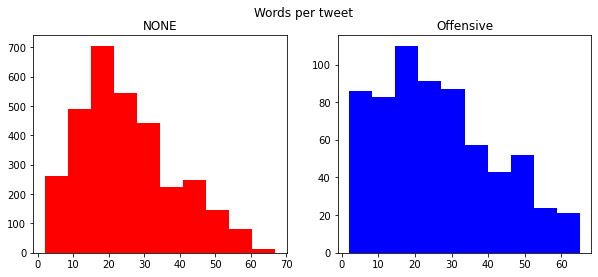

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['task_2']==0]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('NONE')

train_words=df[df['task_2']==1]['word_count']
ax2.hist(train_words,color='blue')
ax2.set_title('Offensive')

fig.suptitle('Words per tweet')
plt.show()

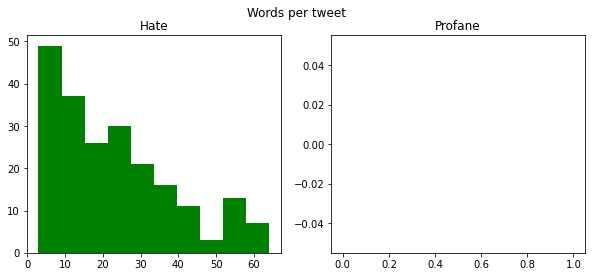

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['task_2']==3]['word_count']
ax1.hist(train_words,color='green')
ax1.set_title('Hate')

train_words=df[df['task_2']==4]['word_count']
ax2.hist(train_words,color='orange')
ax2.set_title('Profane')

fig.suptitle('Words per tweet')
plt.show()

# Common text preprocessing

In [25]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
    
  


In [26]:
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2,word_count,char_count,unique_word_count
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,0,24,265,24
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,0,38,212,35
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,0,15,99,14
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,1,7,42,7
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,0,33,144,31


In [27]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2,word_count,char_count,unique_word_count,clean_text
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,0,24,265,24,rssurjewala hindu die hinduslivesmatter kindat...
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,0,38,212,35,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,0,15,99,14,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,1,7,42,7,askanshul आसमन कतब क नजयज औलद ह
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,0,33,144,31,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...


In [28]:
new_df = df[['clean_text','task_2']]

In [29]:
new_df.head()

,clean_text,task_2
0,rssurjewala hindu die hinduslivesmatter kindat...,0
1,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...,0
2,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...,0
3,askanshul आसमन कतब क नजयज औलद ह,1
4,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...,0


In [30]:
df['task_2'].value_counts()

0    3161
1     654
2     566
3     213
Name: task_2, dtype: int64

In [31]:
#converting to lowercase
new_df["clean_text"] = new_df["clean_text"].str.lower()#.str.split()
new_df.head(5)

<ipython-input-31-6f281371d216>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["clean_text"] = new_df["clean_text"].str.lower()#.str.split()


,clean_text,task_2
0,rssurjewala hindu die hinduslivesmatter kindat...,0
1,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...,0
2,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...,0
3,askanshul आसमन कतब क नजयज औलद ह,1
4,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...,0


# removing stopwords

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [34]:
new_df['clean_text'].apply(lambda x: [item for item in x if item not in stop])

0       [r, u, r, j, e, w, l,  , h, n, u,  , e,  , h, ...
1       [स, ब,  , ल, ग,  , इ, त, न,  , प, स,  , ड, न, ...
2       [श, र,  , ए,  , स, व, न,  , श, ह, ब, द, द, न, ...
3       [k, n, h, u, l,  , आ, स, म, न,  , क, त, ब,  , ...
4       [h, k, h,  , इ, स,  , क, ह, त,  , ह,  , द, ग, ...
                              ...                        
4589    [स, व, न,  , क,  , प, र, व,  , स, स, द,  , म, ...
4590    [व, र, ष,  , क,  , द, र, न,  , क, श, म, र,  , ...
4591    [क, स, न,  , क,  , म, द,  , क,  , ध, ब, प, ट, ...
4592    [r, v, h, k,  , n, e, w, l, u, n, r,  , b, h, ...
4593    [ब, ह, र,  , क,  , ल, ग,  , इ, न,  , झ, ठ,  , ...
Name: clean_text, Length: 4594, dtype: object

In [35]:
new_df.head(6)

,clean_text,task_2
0,rssurjewala hindu die hinduslivesmatter kindat...,0
1,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...,0
2,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...,0
3,askanshul आसमन कतब क नजयज औलद ह,1
4,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...,0
5,sandeep news बहर क आम जनत क बहत ह नरजग ह कदर स...,2


In [36]:
new_df.shape

(4594, 2)

In [37]:
new_df.isnull().sum()

clean_text    0
task_2        0
dtype: int64

In [38]:
new_df.head(7)

,clean_text,task_2
0,rssurjewala hindu die hinduslivesmatter kindat...,0
1,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...,0
2,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...,0
3,askanshul आसमन कतब क नजयज औलद ह,1
4,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...,0
5,sandeep news बहर क आम जनत क बहत ह नरजग ह कदर स...,2
6,यह तर असलयत ह क चर रज करग खत म लकन कभ भ उस सवक...,1


# splitting data into test ad train

In [39]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.task_2.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (3675, 2)
valid shape :  (919, 2)


# Use Of Counter Vectorizer 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_text.values)
X_valid = vectorizer.transform(valid.clean_text.values)

y_train = train.task_2.values
y_valid = valid.task_2.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (3675, 11628)
X_train.shape :  (919, 11628)
y_train.shape :  (3675,)
y_valid.shape :  (919,)


# Naive Bayes Classifier 


In [41]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8598639455782313
Validation accuracy Score :  0.6931447225244831
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       798
           1       0.29      0.47      0.36        81
           2       0.08      0.23      0.12        39
           3       0.02      1.00      0.05         1

    accuracy                           0.69       919
   macro avg       0.33      0.61      0.34       919
weighted avg       0.84      0.69      0.75       919



# Stochastic Gradient Descent-SGD Classifier

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9907482993197279
Validation accuracy Score :  0.6811751904243744
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       695
           1       0.36      0.39      0.37       121
           2       0.17      0.28      0.21        69
           3       0.28      0.35      0.31        34

    accuracy                           0.68       919
   macro avg       0.42      0.45      0.43       919
weighted avg       0.73      0.68      0.70       919



# RANDOM FOREST CLASSIFIER 

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9940136054421769
Validation accuracy Score :  0.7029379760609358
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       792
           1       0.27      0.47      0.35        77
           2       0.07      0.30      0.11        27
           3       0.19      0.35      0.24        23

    accuracy                           0.70       919
   macro avg       0.37      0.47      0.38       919
weighted avg       0.84      0.70      0.76       919



# Extreme Gradient Boosting 

In [44]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

C:\Users\win10\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.9028571428571428
Validation accuracy Score :  0.6953210010881393
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       757
           1       0.27      0.41      0.32        86
           2       0.13      0.33      0.19        45
           3       0.26      0.35      0.30        31

    accuracy                           0.70       919
   macro avg       0.39      0.46      0.41       919
weighted avg       0.79      0.70      0.74       919



# Support vector machine

In [45]:
from sklearn.svm import SVC

svc = SVC(probability=True)

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.866938775510204
Validation accuracy Score :  0.7105549510337323
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       814
           1       0.34      0.50      0.41        90
           2       0.04      0.29      0.06        14
           3       0.02      1.00      0.05         1

    accuracy                           0.71       919
   macro avg       0.34      0.63      0.34       919
weighted avg       0.88      0.71      0.78       919



# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9836734693877551
Validation accuracy Score :  0.720348204570185
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       736
           1       0.38      0.46      0.42       109
           2       0.19      0.42      0.27        53
           3       0.26      0.52      0.34        21

    accuracy                           0.72       919
   macro avg       0.44      0.55      0.47       919
weighted avg       0.80      0.72      0.75       919



C:\Users\win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# CATBOOST MODEL 

In [47]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [48]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [49]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [50]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.7948299319727891
Validation accuracy Score :  0.720348204570185
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       804
           1       0.30      0.47      0.36        83
           2       0.06      0.44      0.11        16
           3       0.21      0.56      0.31        16

    accuracy                           0.72       919
   macro avg       0.38      0.56      0.41       919
weighted avg       0.87      0.72      0.78       919



# All the multiclass models test accuracy 

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.720348
6,CatBoost,0.720348
0,Support Vector Machines,0.710555
2,Random Forest,0.702938
5,XGBoost,0.695321
3,Naive Bayes,0.693145
4,Stochastic Gradient Decent,0.681175


# Test

In [52]:
#Testing it on new dataset with the best model
from sklearn.feature_extraction.text import TfidfVectorizer
df_test=pd.read_csv('HASOC_Hindi_2021_Test.csv')  #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 

In [53]:
df_test.head(6)

,id,tweet_id,text,clean_text
0,60c5d7495659ea5e55df0546,hi_hasoc_2021_5,@hemantmkpandya @news24tvchannel @Aloksharmaai...,hemantmkpandya news tvchannel aloksharmaaicc m...
1,60c5d7495659ea5e55df0591,hi_hasoc_2021_7,वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ फ...,वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ
2,60c5d7495659ea5e55df0622,hi_hasoc_2021_12,घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...,घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...
3,60c5d7495659ea5e55df0666,hi_hasoc_2021_13,@dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...,dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...
4,60c5d7495659ea5e55df067b,hi_hasoc_2021_15,यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...,यह मझ चन कय नह पडत एक ह शखस थ जहन म कय justice...
5,60c5d7495659ea5e55df0501,hi_hasoc_2021_17,फट्टू हैं bjp वाले #CruelMamata #BengalViolenc...,फटट ह bjp वल cruelmamata bengalviolence bengal...


In [54]:
#CATBOOST
X_vector = vectorizer.transform(X_test) #converting X_test to vector
y_predict = clf2.predict(X_vector)      #use the trained model on X_vector
y_prob = clf2.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('submission7.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.485414       1  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.384081       0  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.057330       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.

In [55]:
#LOGISTIC REGRESSION
y_predict = logreg.predict(X_vector)      #use the trained model on X_vector
y_prob = logreg.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('submission8.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.330975       0  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.527005       1  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.153448       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.

In [56]:
#RANDOM FOREST
y_predict = rf_clf.predict(X_vector)      #use the trained model on X_vector
y_prob = rf_clf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('randomf.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...          0.44       0  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ          0.32       3  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...          0.05       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...        

In [57]:
#NAIVE BAYES
y_predict = naiveByes_clf.predict(X_vector)      #use the trained model on X_vector
y_prob = naiveByes_clf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('naiveb.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.812852       1  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.373036       0  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.010191       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.

In [58]:
#XGBOOST
y_predict = xgboost_clf.predict(X_vector)      #use the trained model on X_vector
y_prob = xgboost_clf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('xg.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.542603       1  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.480937       1  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.082911       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.

In [59]:
#SUPPORT VECTOR MACHINE
y_predict = svc.predict(X_vector)      #use the trained model on X_vector
y_prob = svc.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_2']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_2']].reset_index(drop=True)
final.to_csv('svm2.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_2  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.772971       1  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.481685       1  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.100522       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.